In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

2024-03-25 07:54:23.986020: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 07:54:23.986143: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 07:54:24.120930: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

In [4]:
n_steps = 3

In [5]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)


In [6]:
X, y = prepare_data(timeseries_data, n_steps)

In [7]:
X, y

(array([[110, 125, 133],
        [125, 133, 146],
        [133, 146, 158],
        [146, 158, 172],
        [158, 172, 187],
        [172, 187, 196]]),
 array([146, 158, 172, 187, 196, 210]))

In [8]:
X.shape

(6, 3)

In [9]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [10]:
X

array([[[110],
        [125],
        [133]],

       [[125],
        [133],
        [146]],

       [[133],
        [146],
        [158]],

       [[146],
        [158],
        [172]],

       [[158],
        [172],
        [187]],

       [[172],
        [187],
        [196]]])

In [11]:
X.shape

(6, 3, 1)

In [12]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.fit(X, y, epochs=300, verbose=1)


Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 28695.1094
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 27834.0215
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 26965.1309
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 26271.2715
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 25753.0918
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 25293.1953
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 24830.3711
Epoch 8/300


I0000 00:00:1711353753.618210      85 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711353753.646679      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 24342.5273
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 23816.0000
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 23234.3418
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 22577.5137
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 21836.3398
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 20998.8887
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 20034.2871
Epoch 15/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 19009.4219
Epoch 16/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 17986.5254
Epoch 17/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 17038.7402
Epoch 18/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16193.7031
Epoch 19/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15377.9551
Epoch 20/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 14516.9453
Epoch 21/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13562.7852
Epoch 22/300
1/1 ━━━━━━━━━━━━━━━━━

In [18]:
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[223.19891]
1 day input [196.         210.         223.19891357]
1 day output [[233.46404]]
2 day input [210.         223.19891357 233.46403503]
2 day output [[247.85788]]
3 day input [223.19891 233.46404 247.85788]
3 day output [[261.12576]]
4 day input [233.46404 247.85788 261.12576]
4 day output [[273.437]]
5 day input [247.85788 261.12576 273.437  ]
5 day output [[288.5609]]
6 day input [261.12576 273.437   288.5609 ]
6 day output [[302.8899]]
7 day input [273.437  288.5609 302.8899]
7 day output [[317.2814]]
8 day input [288.5609 302.8899 317.2814]
8 day output [[333.58545]]
9 day input [302.8899  317.2814  333.58545]
9 day output [[349.56378]]
[223.19891, 233.46404, 247.85788, 261.12576, 273.437, 288.5609, 302.8899, 317.2814, 333.58545, 349.56378]


In [19]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [20]:
lst_output

[223.19891,
 233.46404,
 247.85788,
 261.12576,
 273.437,
 288.5609,
 302.8899,
 317.2814,
 333.58545,
 349.56378]

In [21]:
import matplotlib.pyplot as plt

In [22]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

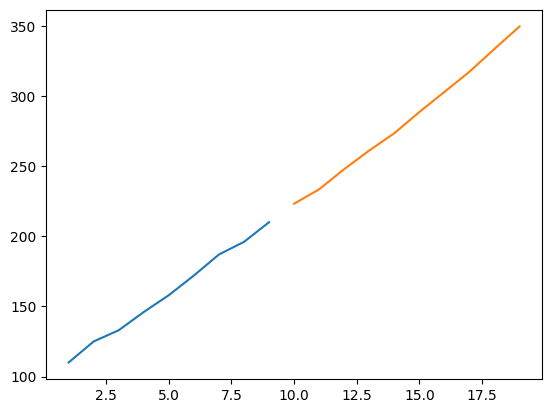

In [23]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)